# Consommation des moteurs.

## Etape 2. Dépendance linéaire à la durée.

In [13]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [14]:
datadir = "../data/"
df = pd.read_hdf(os.path.join(datadir,"out","Results.h5"),"phase_table")

In [15]:
df

,AC,ENG,Flight,Phase,Weight [Kg],Leg [h],T_oil_init [C],Duration [h],Alt_max [ft],Mach_max,Slope [ft/s],Egt_mean [C],TAT_max [C],TAT_min [C],T_oil_range [C],TLA [#],NAIV [s],Volume [l]
0,AC01,Left,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,13.334751,50,0.000000,824.614809
1,AC01,Right,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,15.468311,49,0.000000,825.452162
2,AC01,Left,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,15.468311,10,0.000000,874.681045
3,AC01,Right,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,16.535091,9,0.000000,870.679693
4,AC01,Left,2,climb,3667.201361,1.956111,73.074434,0.311944,40825.620025,0.624464,34.549785,788.444108,25.948032,-21.353068,22.935771,65,0.000000,896.926225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,AC03,Right,999,descend,2690.535261,1.458611,55.472563,0.352222,37621.701406,0.583381,27.702830,495.593485,14.325476,-28.921244,16.001701,144,506.049591,278.170176
1994,AC03,Left,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.001701,222,681.264939,803.358004
1995,AC03,Right,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.535091,232,681.264939,831.856418
1996,AC03,Left,1001,descend,2680.301984,1.505000,48.538492,0.373889,37134.854149,0.591598,25.752990,483.587175,10.811680,-27.569784,16.535091,205,0.000000,278.907346


Construction de la table des durées de vols.

In [16]:
dff = df[["AC","ENG","Flight","Phase","Duration [h]","Volume [l]"]]

In [17]:
dffs = dff.drop(columns=["Phase"]).groupby(["AC","ENG","Flight"]).sum()

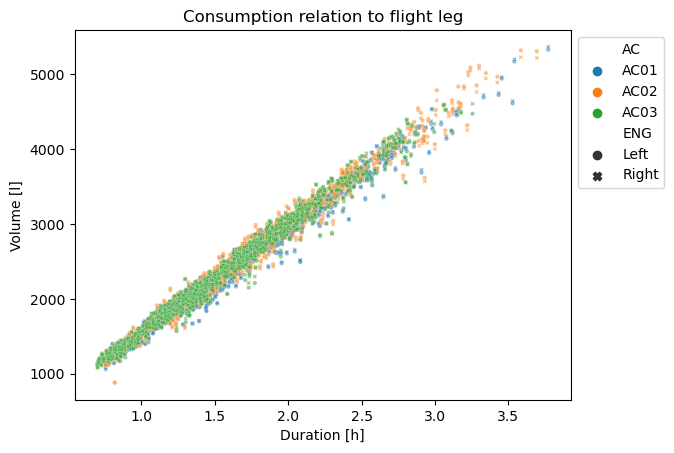

In [18]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
ax = sns.scatterplot(data=dffs,x="Duration [h]", y="Volume [l]", 
                     hue="AC", style="ENG", s=10, alpha=0.5)
ax.set(title="Consumption relation to flight leg")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

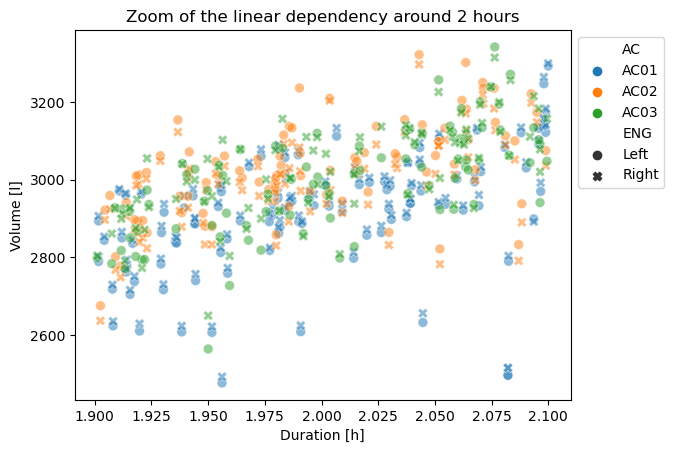

In [19]:
ax = sns.scatterplot(data=dffs[(dffs["Duration [h]"]>1.9) & (dffs["Duration [h]"]<2.1)],
                               x="Duration [h]", y="Volume [l]", hue="AC", style="ENG", 
                               s=50, alpha=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title="Zoom of the linear dependency around 2 hours") ;

Création d'un modèle global sur la durée.

In [20]:
cols = dffs.columns
units = dict([c.split(' ') for c in cols])
dffs.columns = units.keys()

In [21]:
linmod = smf.ols("Volume ~ Duration", data=dffs).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.336e+05
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:22:01   Log-Likelihood:                -36112.
No. Observations:                5982   AIC:                         7.223e+04
Df Residuals:                    5980   BIC:                         7.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.5581      4.193     30.421      0.0

In [22]:
from utils import RelativeIqr

y = dffs["Volume"].values
hy = linmod.predict()
res = RelativeIqr(y,hy,p=20)

Relative Iqr Score = 16.7%


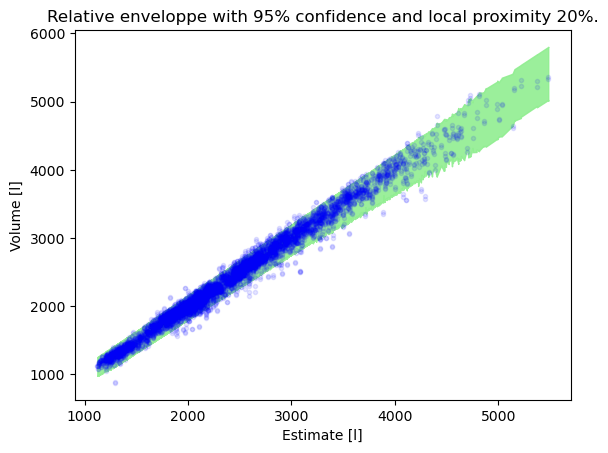

In [30]:
res.plot()

In [24]:
linmod.resid

AC    ENG    Flight
AC01  Left   0         120.594033
             1         119.100559
             2           6.480269
             3        -109.901987
             4          22.242472
                          ...    
AC03  Right  997        24.919160
             998       -11.499378
             999        -6.571204
             1000      -67.527978
             1001      -17.549666
Length: 5982, dtype: float64